In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input image to a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2593 - accuracy: 0.9263 - val_loss: 0.1368 - val_accuracy: 0.9572
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.0946 - val_accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0778 - accuracy: 0.9766 - val_loss: 0.0817 - val_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0798 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 0.0848 - val_accuracy: 0.9739


In [5]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9739
Test accuracy: 0.9739000201225281


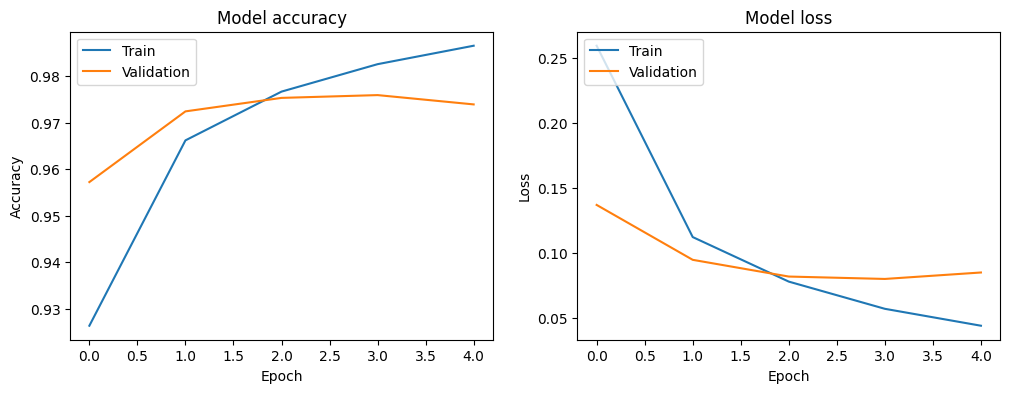

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
